In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, Model
# from preprocess import *
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
import itertools
import numpy as np
from sklearn.utils import class_weight
import pandas as pd
# matplotlib.use('agg')
%matplotlib inline
pd.set_option('display.max_columns', None)
dimVectors = 20
n_class = 30

In [4]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

print(f'Train Set : {train_dataset.shape}')
print(f'Test Set : {test_dataset.shape}')
# df_train.head()

Train Set : (6079, 41)
Test Set : (476, 11)


In [5]:
train_dataset.columns

Index(['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfa

In [6]:
train_dataset.describe()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,question_opinion_seeking,question_type_choice,question_type_compare,question_type_consequence,question_type_definition,question_type_entity,question_type_instructions,question_type_procedure,question_type_reason_explanation,question_type_spelling,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
count,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000,6079.000000
mean,4829.665899,0.892663,0.595301,0.057301,0.698525,0.772633,0.793689,0.587478,0.507275,0.238745,0.004469,0.429978,0.284915,0.038137,0.010035,0.030762,0.065225,0.497587,0.166063,0.386385,0.000823,0.799931,0.925408,0.654823,0.960054,0.968626,0.854680,0.479547,0.130641,0.502468,0.908254
std,2789.689555,0.132047,0.219470,0.182196,0.350938,0.303023,0.336622,0.135900,0.185987,0.335057,0.045782,0.365952,0.368826,0.153635,0.074240,0.138065,0.197582,0.423138,0.257301,0.383384,0.020489,0.178420,0.114836,0.107666,0.086926,0.074631,0.130743,0.422921,0.225718,0.407097,0.100708
min,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.333333,0.200000,0.000000,0.000000,0.000000,0.333333
25%,2389.000000,0.777778,0.444444,0.000000,0.500000,0.666667,0.666667,0.444444,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.888889,0.666667,1.000000,1.000000,0.800000,0.000000,0.000000,0.000000,0.888889
50%,4847.000000,0.888889,0.555556,0.000000,0.666667,1.000000,1.000000,0.555556,0.444444,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.333333,0.000000,0.833333,1.000000,0.666667,1.000000,1.000000,0.866667,0.500000,0.000000,0.500000,0.888889
75%,7222.000000,1.000000,0.777778,0.000000,1.000000,1.000000,1.000000,0.666667,0.666667,0.333333,0.000000,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333,0.666667,0.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,1.000000,0.333333,1.000000,1.000000
max,9647.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
import seaborn as sns


def word_count(sentense):
    sentense = sentense.strip()

    return len(sentense.split(" "))

def data_stats_plot(train_dataset,test_dataset,field):
    fig, ax = plt.subplots(1,2, figsize = ( 20 , 5))


    field_lengths_train = np.log(train_dataset[field].apply(len))
    field_lengths_test = np.log(test_dataset[field].apply(len))
    field_lengths_train_words = np.log(train_dataset[field].apply(word_count))
    field_lengths_test_words = np.log(test_dataset[field].apply(word_count))


    sns.histplot(field_lengths_train, label="Train", kde=True, stat="density", linewidth=0,  color="red", ax=ax[0])
    sns.histplot(field_lengths_test, label="Test", kde=True, stat="density", linewidth=0,  color="blue", ax=ax[0])
    sns.histplot(field_lengths_train_words, label="Train", kde=True, stat="density", linewidth=0,  color="red", ax=ax[1])
    sns.histplot(field_lengths_test_words, label="Test", kde=True, stat="density", linewidth=0,  color="blue", ax=ax[1])

    # Set label for x-axis
    ax[0].set_xlabel( "No. of characters" , size = 12 )
    
    # Set label for y-axis
    ax[0].set_ylabel( "Density of character" , size = 12 )
    
    # Set title for plot
    ax[0].set_title( f"Density of characters in '{field}' feature\n" , size = 15 )

    ax[0].legend()


    # Set label for x-axis
    ax[1].set_xlabel( "No. of Words" , size = 12 )
    
    # Set label for y-axis
    ax[1].set_ylabel( "Density of Words" , size = 12 )
    
    # Set title for plot
    ax[1].set_title( f"Density of Words in '{field}' feature\n" , size = 15 )

    ax[1].legend()



# plt.show();

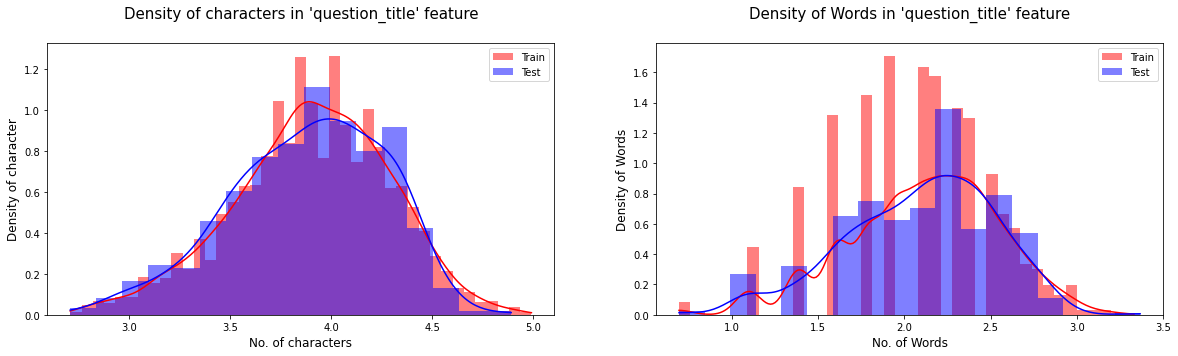

In [8]:
data_stats_plot(train_dataset,test_dataset,'question_title')

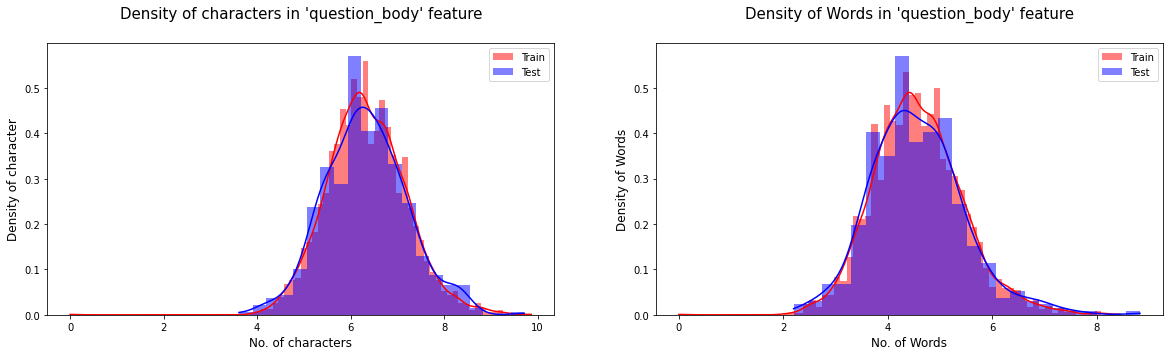

In [9]:
data_stats_plot(train_dataset,test_dataset,'question_body')

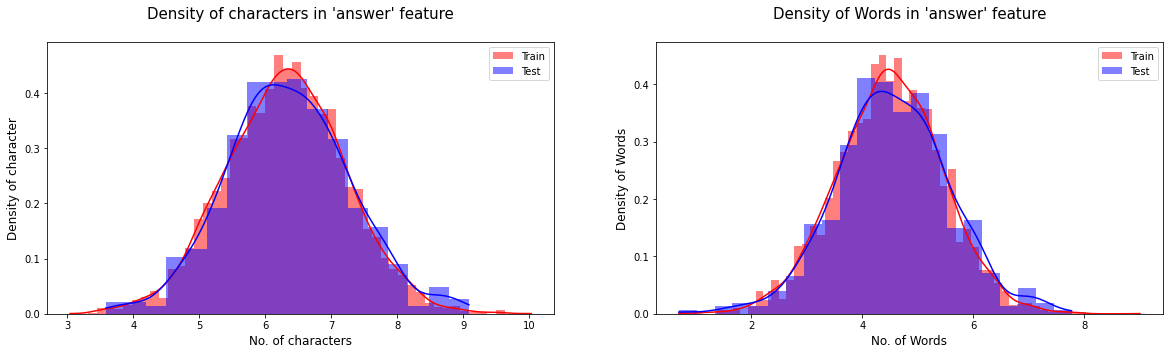

In [10]:
data_stats_plot(train_dataset,test_dataset,'answer')

In [11]:
train_category_feature_count = train_dataset['category'].value_counts()
test_category_feature_count = test_dataset['category'].value_counts()

print("Train category:\n",train_category_feature_count)
print()
print("Test category:\n",test_category_feature_count)

Train category:
 TECHNOLOGY       2441
STACKOVERFLOW    1253
CULTURE           963
SCIENCE           713
LIFE_ARTS         709
Name: category, dtype: int64

Test category:
 TECHNOLOGY       204
STACKOVERFLOW    103
CULTURE           64
SCIENCE           58
LIFE_ARTS         47
Name: category, dtype: int64


Text(0, 0.5, 'count')

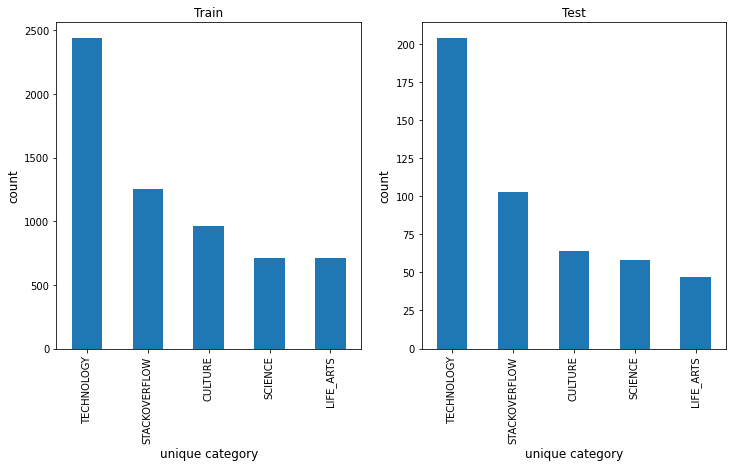

In [12]:
figure, ax = plt.subplots(1,2, figsize=(12, 6))

train_category_feature_count.plot(kind='bar', ax=ax[0])
test_category_feature_count.plot(kind='bar', ax=ax[1])

ax[0].set_title('Train')
ax[0].set_xlabel( "unique category" , size = 12 )
ax[0].set_ylabel( "count" , size = 12 )

ax[1].set_title('Test')
ax[1].set_xlabel( "unique category" , size = 12 )
ax[1].set_ylabel( "count" , size = 12 )


In [13]:
for label in train_dataset.columns[11:]:
    print(f"{label:.20}: no. of unique label values: {len(train_dataset[label].unique())}")

question_asker_inten: no. of unique label values: 9
question_body_critic: no. of unique label values: 9
question_conversatio: no. of unique label values: 5
question_expect_shor: no. of unique label values: 5
question_fact_seekin: no. of unique label values: 5
question_has_commonl: no. of unique label values: 5
question_interesting: no. of unique label values: 9
question_interesting: no. of unique label values: 9
question_multi_inten: no. of unique label values: 5
question_not_really_: no. of unique label values: 5
question_opinion_see: no. of unique label values: 5
question_type_choice: no. of unique label values: 5
question_type_compar: no. of unique label values: 5
question_type_conseq: no. of unique label values: 5
question_type_defini: no. of unique label values: 5
question_type_entity: no. of unique label values: 5
question_type_instru: no. of unique label values: 5
question_type_proced: no. of unique label values: 5
question_type_reason: no. of unique label values: 5
question_typ

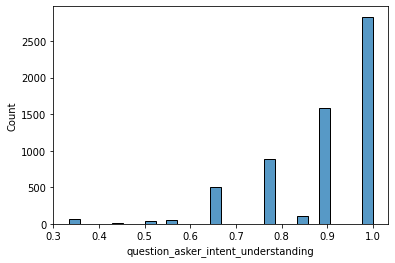

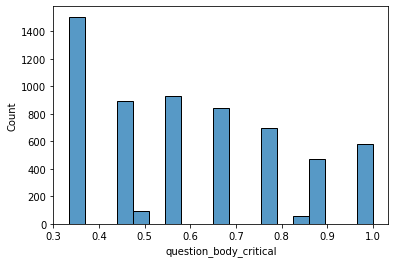

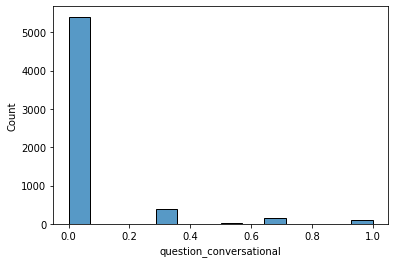

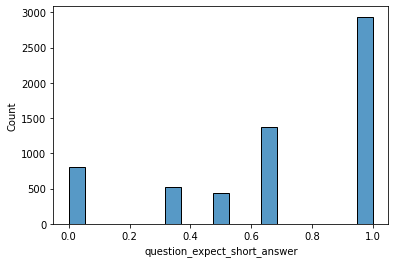

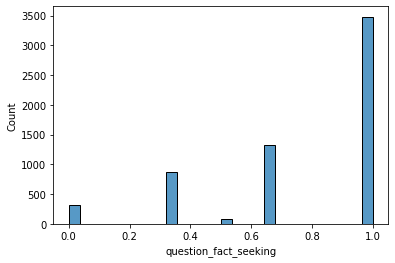

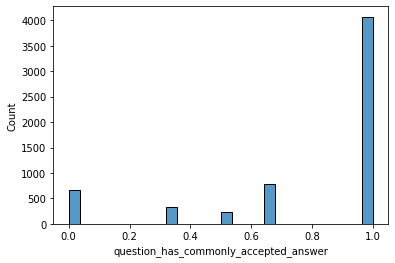

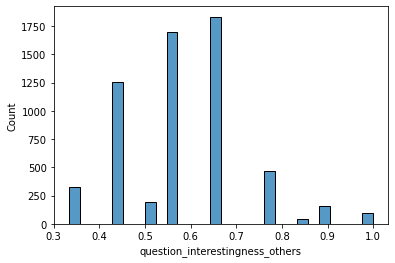

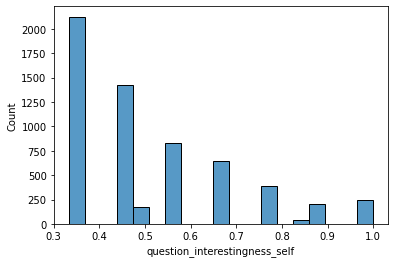

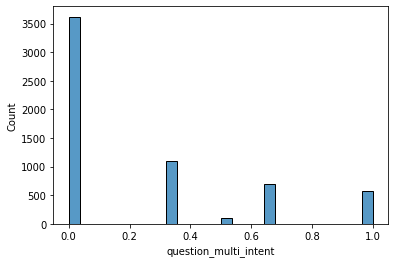

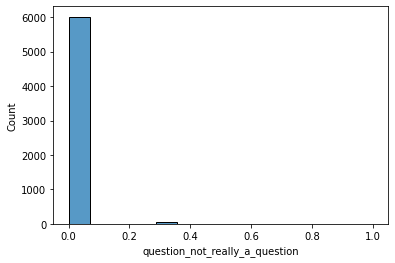

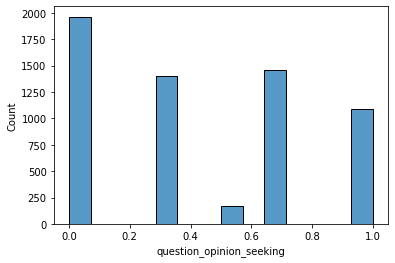

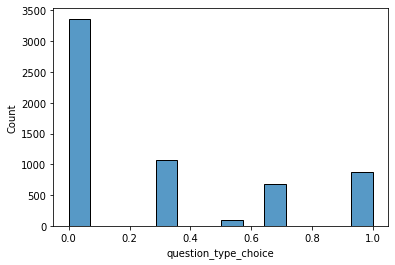

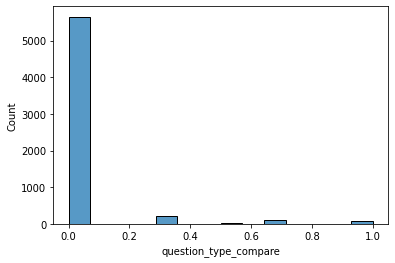

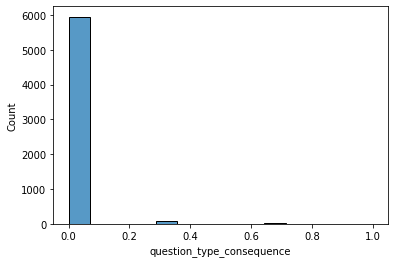

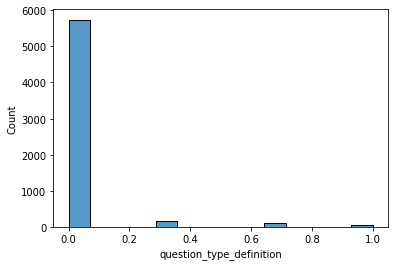

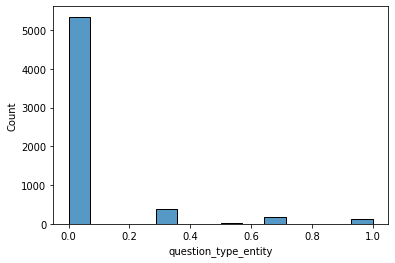

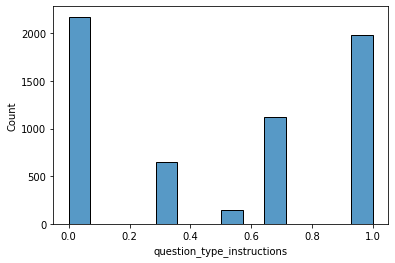

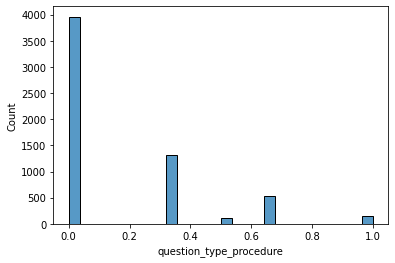

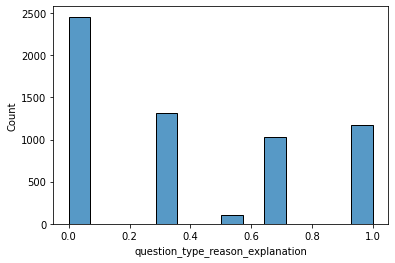

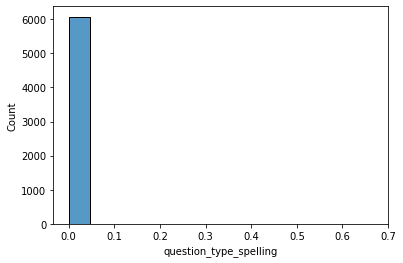

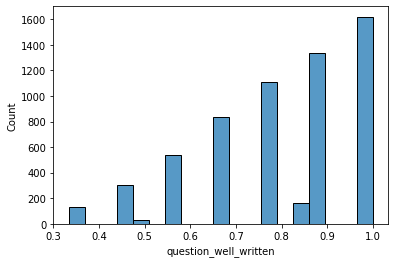

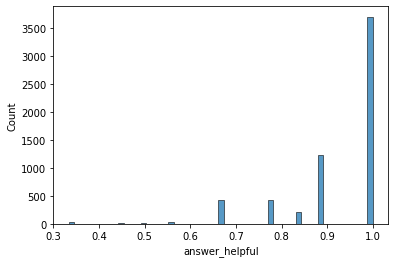

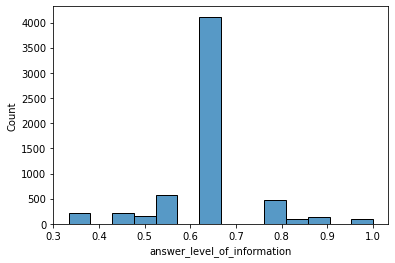

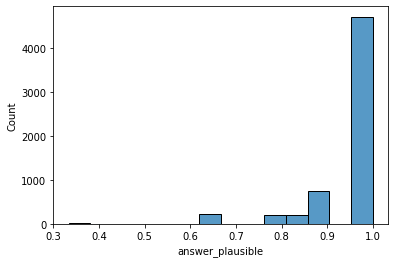

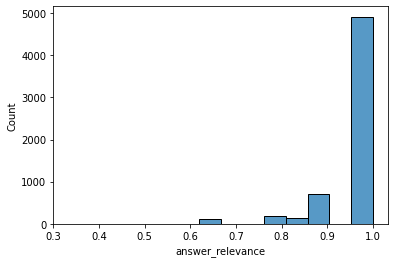

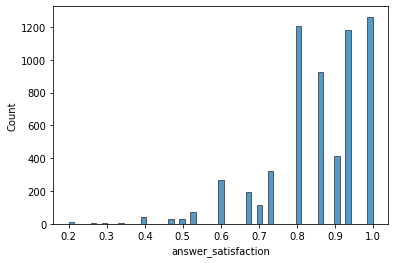

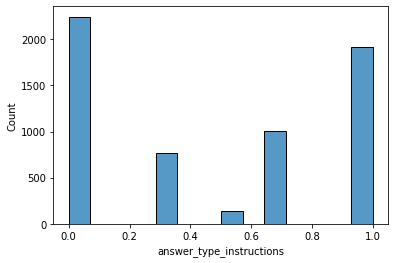

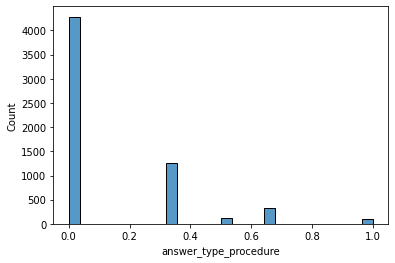

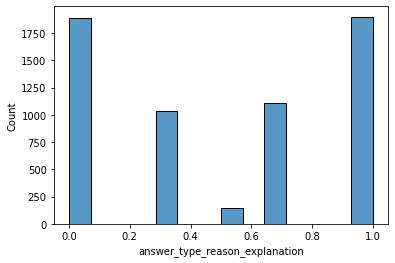

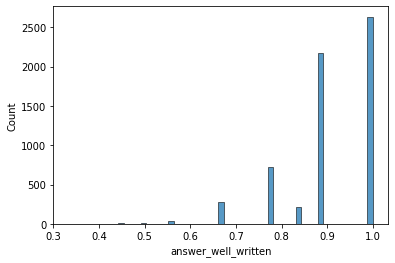

In [14]:
for label in train_dataset.columns[11:]:
    sns.histplot(train_dataset[label], label=label, kde=False)
    plt.show()

<AxesSubplot:>

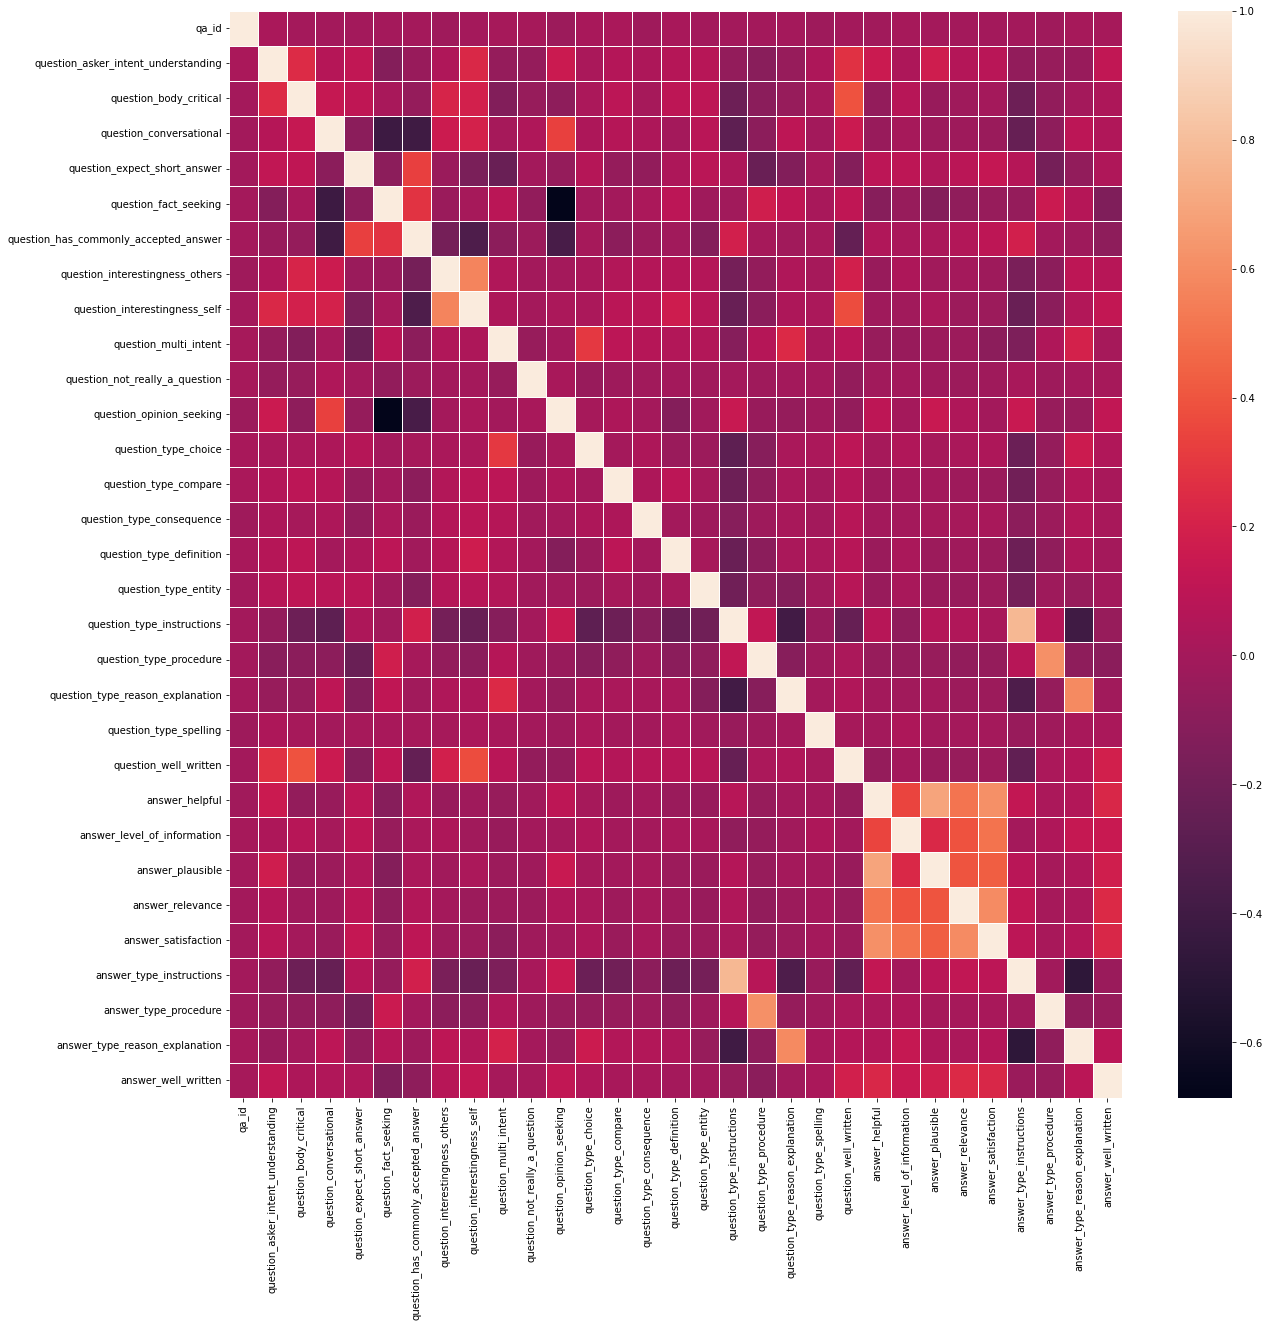

In [15]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(train_dataset[11:].corr(), linewidths=1, ax=ax, annot_kws={"fontsize":40})
# plt.show();

In [16]:
import re

def decontracted(phrase):
    phrase = re.sub(r"(W|w)on(\'|\’)t ", "will not ", phrase)
    phrase = re.sub(r"(C|c)an(\'|\’)t ", "can not ", phrase)
    phrase = re.sub(r"(Y|y)(\'|\’)all ", "you all ", phrase)
    phrase = re.sub(r"(Y|y)a(\'|\’)ll ", "you all ", phrase)
    phrase = re.sub(r"(I|i)(\'|\’)m ", "i am ", phrase)
    phrase = re.sub(r"(A|a)isn(\'|\’)t ", "is not ", phrase)
    phrase = re.sub(r"n(\'|\’)t ", " not ", phrase)
    phrase = re.sub(r"(\'|\’)re ", " are ", phrase)
    phrase = re.sub(r"(\'|\’)d ", " would ", phrase)
    phrase = re.sub(r"(\'|\’)ll ", " will ", phrase)
    phrase = re.sub(r"(\'|\’)t ", " not ", phrase)
    phrase = re.sub(r"(\'|\’)ve ", " have ", phrase)
    
    return phrase


def clean_text(x):

    x = str(x)
    for punct in "/-'":
        x = x.replace(punct, ' ')
    for punct in '&':
        x = x.replace(punct, f' {punct} ')
    for punct in '?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~' + '“”’':
        x = x.replace(punct, '')
    return x

def clean_numbers(x):

    x = re.sub('[0-9]{5,}', '12345', x)
    x = re.sub('[0-9]{4}', '1234', x)
    x = re.sub('[0-9]{3}', '123', x)
    x = re.sub('[0-9]{2}', '12', x)
    return x

In [17]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = clean_text(sentance)
        sent = clean_numbers(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [19]:
train_dataset['preprocessed_question_title'] = preprocess_text(train_dataset['question_title'].values)
train_dataset['preprocessed_question_body'] = preprocess_text(train_dataset['question_body'].values)
train_dataset['preprocessed_answer'] = preprocess_text(train_dataset['answer'].values)

100%|██████████| 6079/6079 [00:04<00:00, 1399.24it/s]


In [20]:
def word_count(sentense):
    sentense = sentense.strip()

    return len(sentense.split(" "))

def unique_word_count(sentense):
    sentense = sentense.strip()

    return len(set(sentense.split(" ")))

In [21]:
train_dataset["question_title_num_chars"] = train_dataset["question_title"].apply(len).apply(np.log)
train_dataset["question_body_num_chars"] = train_dataset["question_body"].apply(len).apply(np.log)
train_dataset["answer_num_chars"] = train_dataset["answer"].apply(len).apply(np.log)

train_dataset["question_title_num_words"] = train_dataset["question_title"].apply(word_count).apply(np.log)
train_dataset["question_body_num_words"] = train_dataset["question_body"].apply(word_count).apply(np.log)
train_dataset["answer_num_words"] = train_dataset["answer"].apply(word_count).apply(np.log)

train_dataset["question_title_num_unique_words"] = train_dataset["question_title"].apply(unique_word_count).apply(np.log)
train_dataset["question_body_num_unique_words"] = train_dataset["question_body"].apply(unique_word_count).apply(np.log)
train_dataset["answer_num_unique_words"] = train_dataset["answer"].apply(unique_word_count).apply(np.log)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer = TfidfVectorizer(min_df=2)
tsvd = TruncatedSVD(n_components = 20, n_iter=5)


qt_tfidf = vectorizer.fit_transform(train_dataset['preprocessed_question_title'].values)
tfidf_question_title_train = tsvd.fit_transform(qt_tfidf)


qb_tfidf = vectorizer.fit_transform(train_dataset['preprocessed_question_body'].values)
tfidf_question_body_train = tsvd.fit_transform(qb_tfidf)

ans_tfidf = vectorizer.fit_transform(train_dataset['preprocessed_answer'].values)
tfidf_answer_train = tsvd.fit_transform(ans_tfidf)

In [23]:
train_dataset["tfidf_question_title"] = list(tfidf_question_title_train)
train_dataset["tfidf_question_body"] = list(tfidf_question_body_train)
train_dataset["tfidf_answer"] = list(tfidf_answer_train)

In [24]:
tfidf_question_title_train.shape

(6079, 20)

In [44]:
for i,c in enumerate(train_dataset.columns):
    print(i,c)

0 qa_id
1 question_title
2 question_body
3 question_user_name
4 question_user_page
5 answer
6 answer_user_name
7 answer_user_page
8 url
9 category
10 host
11 question_asker_intent_understanding
12 question_body_critical
13 question_conversational
14 question_expect_short_answer
15 question_fact_seeking
16 question_has_commonly_accepted_answer
17 question_interestingness_others
18 question_interestingness_self
19 question_multi_intent
20 question_not_really_a_question
21 question_opinion_seeking
22 question_type_choice
23 question_type_compare
24 question_type_consequence
25 question_type_definition
26 question_type_entity
27 question_type_instructions
28 question_type_procedure
29 question_type_reason_explanation
30 question_type_spelling
31 question_well_written
32 answer_helpful
33 answer_level_of_information
34 answer_plausible
35 answer_relevance
36 answer_satisfaction
37 answer_type_instructions
38 answer_type_procedure
39 answer_type_reason_explanation
40 answer_well_written
41 p

In [26]:
train_dataset.columns[44:53]

Index(['question_title_num_chars', 'question_body_num_chars',
       'answer_num_chars', 'question_title_num_words',
       'question_body_num_words', 'answer_num_words',
       'question_title_num_unique_words', 'question_body_num_unique_words',
       'answer_num_unique_words'],
      dtype='object')

In [27]:
from sklearn import preprocessing

def scale_vec(df,field):
    x = np.array(df[field]).reshape(-1,1)
    scaler = preprocessing.StandardScaler().fit(x)
    
    df[field] = scaler.transform(x).reshape(-1,)

In [28]:
for f in train_dataset.columns[44:53]:
    scale_vec(train_dataset,f)
# scale_vec(train_dataset,'question_body_num_unique_words')
# scale_vec(train_dataset,'answer_num_unique_words')


In [29]:

train_dataset["question_body_num_unique_words"]

0       0.719468
1       0.689318
2       0.273416
3      -0.443725
4      -0.352372
          ...   
6074   -0.184235
6075    0.293137
6076    0.273416
6077    0.778084
6078   -0.754852
Name: question_body_num_unique_words, Length: 6079, dtype: float64

In [30]:
import os
path_to_glove_file = os.path.join(
    os.path.expanduser("."), "utils/datasets/glove.6B.50d.txt"
)

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [31]:
from tensorflow.keras.layers import TextVectorization
MAX_SEQUENCE_LENGTH = 250
VOCAB_SIZE = 50000

int_vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH)

# num_tokens = len(voc) + 2
# embedding_dim = 100
# hits = 0
# misses = 0

# # Prepare embedding matrix
# embedding_matrix = np.zeros((num_tokens, embedding_dim))
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         # Words not found in embedding index will be all-zeros.
#         # This includes the representation for "padding" and "OOV"
#         embedding_matrix[i] = embedding_vector
#         hits += 1
#     else:
#         misses += 1
# print("Converted %d words (%d misses)" % (hits, misses))

In [32]:
cols = ['preprocessed_question_title', 'preprocessed_question_body', 'preprocessed_answer']
train_dataset['all text'] = train_dataset[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
# int_vectorize_layer.adapt(train_dataset["preprocess_question_body"])

In [34]:
int_vectorize_layer.adapt(train_dataset['all text'])

In [36]:
voc = int_vectorize_layer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))
num_tokens = len(voc) + 2
embedding_dim = 50
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 28484 words (17070 misses)


In [37]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [38]:
int_seq_inputs = keras.Input(shape=(None,))
embedded_seqs = embedding_layer(int_seq_inputs)
x = layers.Bidirectional(layers.LSTM(64))(embedded_seqs)
x = layers.Dense(64,activation='relu')(x)
y = layers.Dense(30,activation='sigmoid')(x)
model = keras.Model(int_seq_inputs,y)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 50)          2277800   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              58880     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 30)                1950      
                                                                 
Total params: 2,346,886
Trainable params: 69,086
Non-trainable params: 2,277,800
______________________________________________

In [59]:
x_train = int_vectorize_layer(np.array([[s] for s in train_dataset['all text'].values])).numpy()
# train_dataset['all text'].numpy()

In [60]:
cols = train_dataset.columns[11:41]
y_train = []
for i in range(len(train_dataset)):
    lbls = []
    for c in cols:
        lbls.append(train_dataset[c][i])
    y_train.append(lbls)

y_train = np.array(y_train)
# train_dataset['labels'] = train_dataset[cols].apply(lambda row : )

In [61]:
n = len(train_dataset)
ntrain = int(0.8*n)
x_val, y_val = x_train[ntrain:], y_train[ntrain:]
x_train, y_train = x_train[:ntrain], y_train[:ntrain]

In [64]:
from scipy.stats import spearmanr
def compute_spearmanr_ignore_nan(trues, preds):
    rhos = []
    for tcol, pcol in zip(np.transpose(trues), np.transpose(preds)):
        rhos.append(spearmanr(tcol, pcol).correlation)
    return np.nanmean(rhos)

def spearcorr(y, y_pred):
    return tf.py_function(compute_spearmanr_ignore_nan, (y, y_pred), tf.double)

In [66]:
model.compile(
    loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=[spearcorr,"acc"]
)
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
38/38 [==============================] - 27s 577ms/step - loss: 0.0476 - spearcorr: 0.3052 - acc: 0.0099 - val_loss: 0.0504 - val_spearcorr: 0.2670 - val_acc: 0.0025
Epoch 2/30
38/38 [==============================] - 26s 670ms/step - loss: 0.0467 - spearcorr: 0.3088 - acc: 0.0146 - val_loss: 0.0504 - val_spearcorr: 0.2705 - val_acc: 0.0058
Epoch 3/30
38/38 [==============================] - 21s 557ms/step - loss: 0.0464 - spearcorr: 0.3137 - acc: 0.0130 - val_loss: 0.0506 - val_spearcorr: 0.2725 - val_acc: 0.0230
Epoch 4/30
38/38 [==============================] - 21s 563ms/step - loss: 0.0462 - spearcorr: 0.3181 - acc: 0.0134 - val_loss: 0.0501 - val_spearcorr: 0.2737 - val_acc: 0.0066
Epoch 5/30
38/38 [==============================] - 23s 621ms/step - loss: 0.0455 - spearcorr: 0.3220 - acc: 0.0177 - val_loss: 0.0501 - val_spearcorr: 0.2756 - val_acc: 0.0189
Epoch 6/30
38/38 [==============================] - 21s 562ms/step - loss: 0.0454 - spearcorr: 0.3264 - acc: 0.0152

In [55]:
x_train.dtype

dtype('int64')

In [56]:
y_train

(6079, 30)

In [67]:
model.save_weights('./saved_wts/my_checkpoint')

In [68]:
history_alt = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30


/Users/sudhanshumishra/Assesment1/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


38/38 [==============================] - 26s 684ms/step - loss: 0.0359 - spearcorr: 0.4045 - acc: 0.0290 - val_loss: 0.0514 - val_spearcorr: 0.2731 - val_acc: 0.0140
Epoch 2/30
38/38 [==============================] - 27s 701ms/step - loss: 0.0354 - spearcorr: 0.4076 - acc: 0.0253 - val_loss: 0.0517 - val_spearcorr: 0.2756 - val_acc: 0.0181
Epoch 3/30
38/38 [==============================] - 22s 577ms/step - loss: 0.0349 - spearcorr: 0.4100 - acc: 0.0286 - val_loss: 0.0522 - val_spearcorr: 0.2754 - val_acc: 0.0222
Epoch 4/30
38/38 [==============================] - 21s 545ms/step - loss: 0.0348 - spearcorr: 0.4115 - acc: 0.0308 - val_loss: 0.0520 - val_spearcorr: 0.2741 - val_acc: 0.0181
Epoch 5/30
38/38 [==============================] - 20s 529ms/step - loss: 0.0344 - spearcorr: 0.4145 - acc: 0.0288 - val_loss: 0.0526 - val_spearcorr: 0.2749 - val_acc: 0.0189
Epoch 6/30
38/38 [==============================] - 21s 550ms/step - loss: 0.0342 - spearcorr: 0.4147 - acc: 0.0300 - val_loss

In [71]:
model.save_weights('./saved_wts/new_checkpoint')

In [72]:
int_seq_inputs = keras.Input(shape=(None,))
embedded_seqs = embedding_layer(int_seq_inputs)
x = layers.Bidirectional(layers.LSTM(64))(embedded_seqs)
x = layers.Dense(64,activation='relu')(x)
y = layers.Dense(30,activation='sigmoid')(x)
model1 = keras.Model(int_seq_inputs,y)
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 50)          2277800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              58880     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 30)                1950      
                                                                 
Total params: 2,346,886
Trainable params: 69,086
Non-trainable params: 2,277,800
____________________________________________

In [73]:
# model1 = create_model()
model1.load_weights('./saved_wts/checkpoint')

2022-08-17 17:35:49.505035: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open ./saved_wts/checkpoint: DATA_LOSS: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?


OSError: Unable to open file (file signature not found)

In [74]:
model.save('./saved_models/my_model')

INFO:tensorflow:Assets written to: ./saved_models/my_model/assets


INFO:tensorflow:Assets written to: ./saved_models/my_model/assets


In [76]:
new_model = keras.models.load_model('./saved_models/my_model',custom_objects={'spearcorr':spearcorr})
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 50)          2277800   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              58880     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 30)                1950      
                                                                 
Total params: 2,346,886
Trainable params: 69,086
Non-trainable params: 2,277,800
______________________________________________